In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [8]:
PATH = 'song_data.csv'
DATASET_SIZE = 10000
XNAME = "song_popularity"
YNAME = "danceability"
dataset = pd.read_csv(PATH)
dataset = dataset.head(DATASET_SIZE)

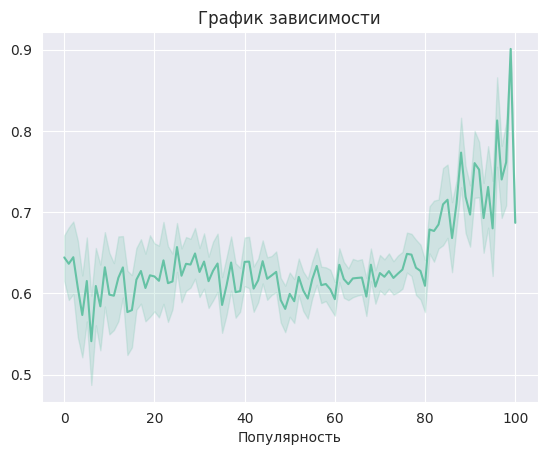

In [9]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(
  x=dataset[XNAME],
  y=dataset[YNAME],
)
plt.title('График зависимости')
plt.xlabel('Популярность')
plt.ylabel('')
plt.show()

In [27]:
x = np.array(dataset[XNAME]).reshape(-1, 1)
y = np.array(dataset[YNAME]).reshape(-1, 1)

DEGREES = 4
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 0.025546764524775303


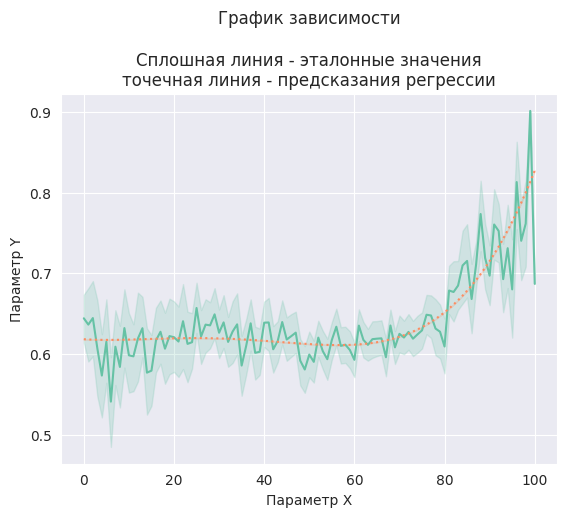

In [28]:
sns.lineplot(
x=dataset[XNAME],
y=dataset[YNAME],
linestyle="solid"
)
sns.lineplot(
x=dataset[XNAME],
y=predictions.reshape(-1),
linestyle="dotted"
)
plt.title(
'График зависимости\n\n'
'Сплошная линия - эталонные значения\n'
'точечная линия - предсказания регрессии'
)
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

In [29]:
x_parameters = np.append(
regression['linearregression'].intercept_[0],
regression['linearregression'].coef_[0][1:]
)
x_parameters

array([ 6.18471792e-01, -3.44685579e-04,  4.19288454e-05, -1.32140015e-06,
        1.14533634e-08])